### LOADING VGG16 WITH PRETRAINED WEIGHTS

In [2]:
from tensorflow.keras.applications import VGG16
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
print("Imported")

model = VGG16(weights = 'imagenet')

Imported


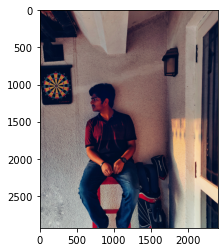

In [3]:
img_path = r"C:\Users\samvi\OneDrive\Pictures\Snapseed-1\IMG_20200309_175524-01.jpeg"
img1 = image.load_img(img_path)
plt.imshow(img1)

img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [4]:
preds = model.predict(x)
print("Predicted: ", decode_predictions(preds, top = 3)[0])

d:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted:  [('n04509417', 'unicycle', 0.25103083), ('n03000684', 'chain_saw', 0.2049114), ('n04023962', 'punching_bag', 0.043519817)]


In [5]:
np.argmax(preds[0])

880

In [6]:
import tensorflow as tf
import tensorflow.keras.backend as K
tf.compat.v1.disable_eager_execution()

tiger_output = model.output[:,292]
last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(tiger_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis = (0,1,2))

iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis = -1)

### PLOTTING OUT HEATMAP

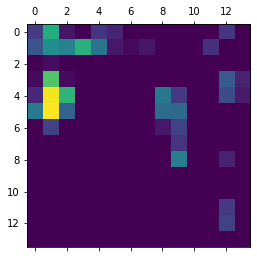

In [7]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

### OPENCV TO OVERLAY HEATMAP INTO THE IMAGE

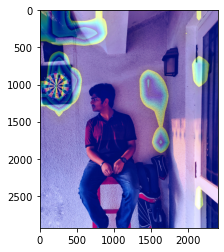

In [9]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap,(img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

save_img_path = r'C:\Users\samvi\OneDrive\Pictures\Snapseed-1\IMG_20200309_175524-01.jpeg'

cv2.imwrite(save_img_path, superimposed_img)
img1 = image.load_img(save_img_path)
plt.imshow(img1)